# Testing the placement-v1 environment

In [1]:
from gym_placement.envs.placement1 import *

/usr/local/lib/python2.7/dist-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


# Training a deep Q network for compute placement

In [7]:
import numpy as np
import gym


from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

Using TensorFlow backend.


In [8]:
from dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy,  LinearAnnealedPolicy
from rl.memory import SequentialMemory

In [9]:
env = placementClass1()

In [10]:
nb_actions = env.action_space.n

In [11]:
input_shape=1
print(input_shape)

1


# Simple NN Model

In [12]:
model = Sequential()
model.add(Dense(8,input_shape=(1,)))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 16        
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
for layer in model.layers:
    print layer.output_shape

(None, 8)
(None, 8)
(None, 5)
(None, 5)


In [14]:
weight_file = 'scenario_model'

In [15]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.05,
                              nb_steps=1000)

memory = SequentialMemory(limit=500000, window_length=1)

In [16]:
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=1, target_model_update=1, policy=policy,gamma=0.0, batch_size=200)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [17]:
dqn.load_weights(weight_file)

In [31]:
dqn.fit(env, nb_steps=1000, visualize=False, verbose=2)

Training for 10 steps ...

5033 4 -0.134362697601
 1/10: episode: 1, duration: 1.121s, episode steps: 1, steps per second: 1, episode reward: -0.134, mean reward: -0.134 [-0.134, -0.134], mean action: 4.000 [4.000, 4.000], mean observation: 100000.000 [100000.000, 100000.000], loss: --, mae: --, mean_q: --, mean_eps: --

39605 0 -0.8
 2/10: episode: 2, duration: 1.025s, episode steps: 1, steps per second: 1, episode reward: -0.800, mean reward: -0.800 [-0.800, -0.800], mean action: 0.000 [0.000, 0.000], mean observation: 100000.000 [100000.000, 100000.000], loss: --, mae: --, mean_q: --, mean_eps: --

33758 3 -1.02012581825
 3/10: episode: 3, duration: 1.843s, episode steps: 1, steps per second: 1, episode reward: -1.020, mean reward: -1.020 [-1.020, -1.020], mean action: 3.000 [3.000, 3.000], mean observation: 100000.000 [100000.000, 100000.000], loss: 0.000043, mae: 0.687907, mean_q: -0.555781, mean_eps: 0.998200

37850 0 -0.8
 4/10: episode: 4, duration: 0.942s, episode steps: 1, st

In [32]:
dqn.save_weights(weight_file, overwrite=True)

# See the output of the trained model

In [33]:
optimal_actions = []

for i in range(10,50000):
    output = model.predict_on_batch([[i]])
    best_action = np.argmax(output)
    optimal_actions.append(best_action)

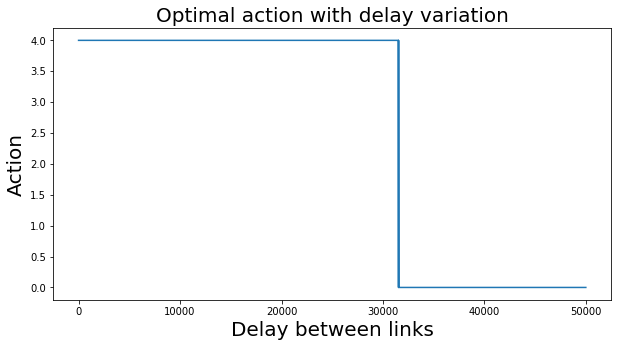

In [34]:
#action = 0, everything local
#action = 4, everything on the server

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,5))
plt.title('Optimal action with delay variation',fontsize=20)
plt.ylabel('Action', fontsize=20)
plt.xlabel('Delay between links',fontsize=20)
plt.plot(optimal_actions)
plt.show()

In [41]:
optimal_reward = []

for i in range(10,50000):
    output = model.predict_on_batch([[i]])
    best_action = np.max(output)
    optimal_reward.append(best_action)

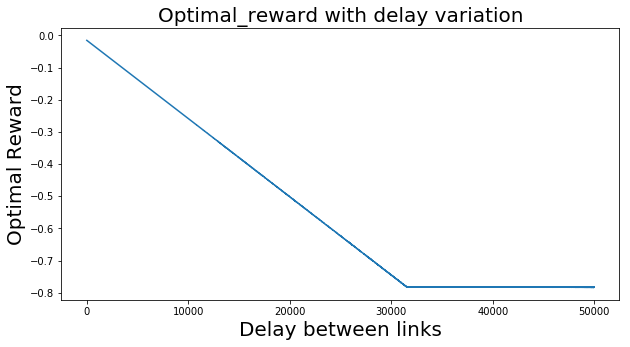

In [42]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,5))
plt.title('Optimal_reward with delay variation',fontsize=20)
plt.ylabel('Optimal Reward', fontsize=20)
plt.xlabel('Delay between links',fontsize=20)
plt.plot(optimal_reward)
plt.show()

In [35]:
experiences = dqn.memory.sample(20)

In [36]:
experiences

[Experience(state0=[array(37813)], action=4, reward=-0.9963369369506836, state1=[array(100000)], terminal1=True),
 Experience(state0=[array(37011)], action=4, reward=-0.9062652587890625, state1=[array(100000)], terminal1=True),
 Experience(state0=[array(4542)], action=1, reward=-0.6781755447387696, state1=[array(100000)], terminal1=True),
 Experience(state0=[array(42269)], action=3, reward=-1.223916721343994, state1=[array(100000)], terminal1=True),
 Experience(state0=[array(17671)], action=3, reward=-0.6330425262451171, state1=[array(100000)], terminal1=True),
 Experience(state0=[array(35805)], action=0, reward=-0.8, state1=[array(100000)], terminal1=True),
 Experience(state0=[array(16004)], action=4, reward=-0.39697790145874023, state1=[array(100000)], terminal1=True),
 Experience(state0=[array(37223)], action=0, reward=-0.8, state1=[array(100000)], terminal1=True),
 Experience(state0=[array(41343)], action=0, reward=-0.8, state1=[array(100000)], terminal1=True),
 Experience(state0=[

In [37]:
dqn.memory.recent_observations

deque([array(100000)])

In [38]:
output[0]

array([-0.7825114, -1.3719022, -1.4281747, -1.4090525, -1.2300562],
      dtype=float32)

In [39]:
optimal_reward_0 = []
optimal_reward_1 = []
optimal_reward_2 = []
optimal_reward_3 = []
optimal_reward_4 = []


for i in range(10,50000):
    output = model.predict_on_batch([[i]])
    optimal_reward_0.append(output[0][0])
    optimal_reward_1.append(output[0][1])
    optimal_reward_2.append(output[0][2])
    optimal_reward_3.append(output[0][3])
    optimal_reward_4.append(output[0][4])

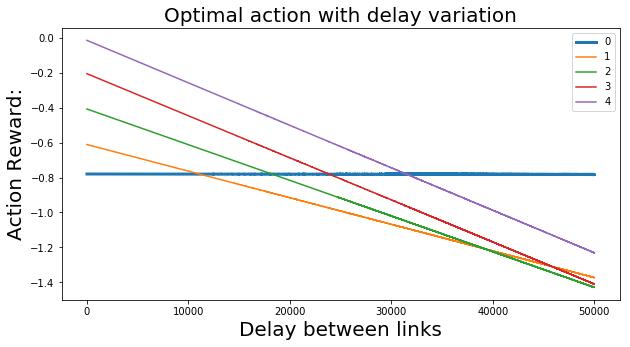

In [40]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,5))
plt.title('Optimal action with delay variation',fontsize=20)
plt.ylabel('Action Reward', fontsize=20)
plt.xlabel('Delay between links',fontsize=20)
plt.plot(optimal_reward_0,label='0',linewidth=3)
plt.plot(optimal_reward_1,label='1')
plt.plot(optimal_reward_2,label='2')
plt.plot(optimal_reward_3,label='3')
plt.plot(optimal_reward_4,label='4')
plt.legend()
plt.show()